<a href="https://colab.research.google.com/github/Acelhaka/MachineLearning/blob/master/CS4340_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train Data
[[ 7.59 67.61]
 [ 9.01 91.18]
 [ 5.17 36.73]
 [-1.86 13.46]
 [ 4.33 28.75]
 [ 0.56 10.31]
 [ 4.36 29.01]
 [ 8.12 75.93]
 [ 0.59 10.35]
 [ 2.51 16.3 ]
 [ 7.33 63.73]
 [ 0.54 10.29]] 


Test Data
[[ 0.9  10.81]
 [ 6.53 52.64]
 [ 2.41 15.81]
 [ 5.58 41.14]
 [ 6.82 56.51]] 


False
Coefficents for Quadrattic equation: a =  [0.99996422] , b=  [0.00029478] ,c =  [9.99965122]
The out of sample error for quadratic Regression  [2.13952054e-05]
[[-1.86 13.46]
 [ 0.54 10.29]
 [ 9.01 91.18]
 [ 8.12 75.93]
 [ 7.59 67.61]
 [ 0.56 10.31]
 [ 4.33 28.75]
 [ 7.33 63.73]]
Weights for λ =  0.1 are  [11.43956169  7.54069484]
Error1  650.4037321093537
Weights for λ =  0.1 are  [0.57206809 7.9579608 ]
Error2  1268.900759370675
Weights for λ =  0.1 are  [8.25393032 7.60876106]
Error3  162.52602937742148
2
Best hypothesis weights for bestWeights λ =  0.1  are =  [8.25393032 7.60876106] 


Weights for λ =  1 are  [9.34429075 7.78106073]
Error1  539.2435545624995
Weights for λ =  1 are  [0.8009382  7.

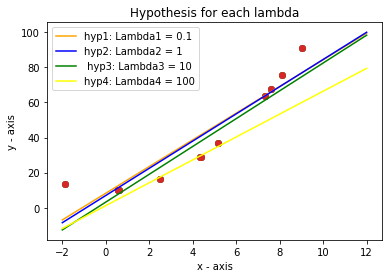

In [43]:
# Amarilda Dyrmishi
# CS4340 
# Project #5
# Due: Dec 3rd 

# Implementing regression with regularization, with the parameter estimated
# from cross-validation. Using function  y = f(x) = x2 + 10. Obtain point
# 



from random import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt 

# generate random numbers from -2 to 12
def generateData(minV,maxV,N):
  arr = [[0]*2 for i in range(N)]    # defining a 2D array with size [rows x cols]
  for j in range(0,N):
    value = random()
    scaledvalue = minV + (value * (maxV - minV)) 
    x = round(scaledvalue,2)
    arr[j][0] = x
    y = round(x**2 + 10, 2)
    arr[j][1] = y
  return arr


def calculateError(X, Y, n):
  SSE = 0
  for i in range(n):
    y_predicted = c + b * X[i] + a * (X[i]**2)
    diff = Y[i] - y_predicted
    Square = diff**2 
    SSE += Square
  return SSE

def calculateCvError(X, Y, n, w0, w1):
  Sce = 0
  for i in range(n):
    y_hat = w0 + w1 * X[i]
    diff = Y[i] - y_hat
    Square = diff**2 
    Sce += Square
  return Sce


#calculating the weight vector with regularization
def predictWeights(λ, X, Y, n_train):
  X0 = np.ones((n_train,1))

  #creating a new vector with x0 [1,1,...n_train] and X
  X=(np.column_stack((np.ones(np.size(X)),X)))
  n, m = X.shape

  #creating an identity matrix of size m ( m = 2, n = 12)
  I = np.identity(m)

  #calculating the weight vector
  w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + λ * I), X.T), Y)
 
  matrix1 = np.linalg.inv(np.dot(X.T, X) + λ * I) 
  matrix2 = np.dot((X.T), Y)
  weights = np.dot(matrix1, matrix2)
  print("Weights for λ = ", λ , "are ", weights) 
  return weights


def crossValidation(λ, X_fold1, X_fold2, X_fold3, Y_fold1, Y_fold2, Y_fold3):

  w1_lamda = predictWeights(λ, np.concatenate((X_fold1,X_fold2)), np.concatenate((Y_fold1,Y_fold2)), 6)

  #validate in the remaining fold
  CvE1 = calculateCvError(X_fold3, Y_fold3, 4, w1_lamda[0], w1_lamda[1])
  print("Error1 " ,CvE1)

  w2_lamda = predictWeights(λ, np.concatenate((X_fold2,X_fold3)), np.concatenate((Y_fold2,Y_fold3)), 6)
  #validate in the remaining fold
  CvE2 = calculateCvError(X_fold1, Y_fold1, 4, w2_lamda[0], w2_lamda[1])
  print("Error2 " ,CvE2)

  w3_lamda = predictWeights(λ, np.concatenate((X_fold1,X_fold3)), np.concatenate((Y_fold1,Y_fold3)), 6)
  #validate in the remaining fold
  CvE3 = calculateCvError(X_fold2, Y_fold2, 4, w3_lamda[0], w3_lamda[1])
  print("Error3 " ,CvE3)

  errors_arr = np.array([CvE1, CvE2, CvE3])
  minErrorIndex = np.argmin(errors_arr)
  print(minErrorIndex)
  weights_arr = np.array([w1_lamda, w2_lamda, w3_lamda])
  bestWeights = weights_arr[minErrorIndex]
  print("Best hypothesis weights for bestWeights λ = ", λ , " are = ", bestWeights, "\n\n")
  SumOfErrcv = (CvE1 + CvE2 + CvE3) / 3
  return bestWeights, SumOfErrcv


def generatePlot(X, Y, weights, name, col):

  #ploting the graph 
  plt.xlabel('x - axis') 
  plt.ylabel('y - axis') 

  plt.title("Hypothesis for each lambda")
  plt.scatter(X, Y)

  i = np.linspace(start = -2, stop = 12, num = 1000)
  y_predicted =   weights[0] + i * weights[1]
  plt.plot(i, y_predicted, label = name, color=col)
  plt.legend()


n_train = 12
n_test = 5
trainData =np.array(generateData(-2,10,n_train))
print("Train Data")
print(trainData, "\n\n")

testData = np.array(generateData(-2,10,n_test))
print("Test Data")
print(testData, "\n\n")

#checking if any data of trainData matching with data from testDAta
check =  any(item in trainData for item in testData)
print(check)
while (check):
  #regenerate other data
  trainData = np.array(generateData(-2,10,12))
  print(trainData)
  testData = np.array(generateData(-2,10,5))
  print(testData)
  check =  any(item in trainData for item in testData)
  print(check)

# A quadratic regression is the process of finding the equation of the parabola that best fits a set of data. 
# As a result, we get an equation of the form:
# The best way to find this equation manually is by using the least squares method. 
# That is, we need to find the values of a,b,and c such that the squared vertical distance 
# between each point (xi,yi) and the quadratic curve y=ax2+bx+c is minimal.
# y =ax2+bx+c where a≠0 .
a = 0    # w2
b = 0    # w1
c = 0    # w0
#y = c + b * x + a * (x**2)

#getting only the first column (x values)
X = trainData[:,0]

#getting only the second column (y values)
Y = trainData[:,1]

X_test = testData[:,0]
Y_test = testData[:,1]


#finding the sum of xs to the fourth power
x4 = np.sum(np.power(X, 4))
#finding the sum of the third power of test x-values
x3 = np.sum(np.power(X, 3))
x2 = np.sum(np.power(X, 2))
x1 = np.sum(X)
x2y = np.sum(np.multiply(np.power(X,2), Y))

xy = np.sum(np.multiply(X, Y))


# The matrix equation for the quadratic curve is given by:
matrix1 = np.array([[x4, x3, x2],
                    [x3, x2, x1],
                    [x2, x1, n_train]])
#print(matrix1)
#print(matrix2)
matrix2 = np.array([[x2y], [xy], [np.sum(Y)]])
#print("matrix2" ,matrix2)

# to solve for the unknowns (a, b, c)
Coef = np.linalg.solve(matrix1, matrix2)

#extracting the coefficents from the matrix of solutions
a = Coef[0,:]
b = Coef[1,:]
c = Coef[2,:]
print("Coefficents for Quadrattic equation: a = " ,a , ", b= ", b, ",c = ", c)

# Calculate test error 
E_out_test = calculateError(X_test, Y_test, n_test)
print("The out of sample error for quadratic Regression ", E_out_test)



##################################################################
# Part 2
#Linear regression with regularization - Ridge  Regression 
# Ridge regression is similar to Linear regression but this time we 
# introduce a small amount of bias. By starting with a worse fit, Ridge Regression
# will perform better against data that does not follow the same pattern as the data
# the model was trained on. When we add bias, we are referring to regularization.The 
# main purpose of regularization is to prevent overfitting



# 3-fold cross validation error
# to find the lambda using cross validation we need to:
# 1: define the model for diffrent values of lambda
# 2: for the fourth models 
# 3: Estimate Ecv(m)
# 4: Select model with the lowest Ecv(m*)
# 5: Use the model and the data to estimate the final hypothesis

#shuffling the traindata
np.random.shuffle(trainData)
fold1, fold2, fold3 = trainData[:4,:], trainData[4:8,:], trainData[8: , :]


print(np.concatenate((fold1,fold2)))
X_fold1 = fold1[:,0]
Y_fold1 = fold1[:,1]

X_fold2 = fold2[:,0]
Y_fold2 = fold2[:,1]

X_fold3 = fold3[:,0]
Y_fold3 = fold3[:,1]  

# to find the weight vector we use the below formula
#w = (XTX + lambdaI)inverse XTy
lambda1 = 0.1
lambda2 = 1
lambda3 = 10
lambda4 = 100
#lambda_arr = np.array([lambda1, lambda2, lambda3, lambda4])

#finding the best hypothesis for lambda1 = 0.1 and finding the Error of Cross Validation
hypforLambda1, Evc1 = crossValidation(lambda1, X_fold1, X_fold2, X_fold3, Y_fold1, Y_fold2, Y_fold3)
#generating plot for lambda = .1 by choosing best hypothesis using CV
generatePlot(trainData[:,0], trainData[:,1], hypforLambda1, "hyp1: Lambda1 = 0.1", 'orange')

#finding the best hypothesis for lambda2 = 1 and finding the Error of Cross Validation
hypforLambda2, Evc2 = crossValidation(lambda2, X_fold1, X_fold2, X_fold3, Y_fold1, Y_fold2, Y_fold3)
#generating plot for lambda = 1 by choosing best hypothesis using CV
generatePlot(X, Y, hypforLambda2, "hyp2: Lambda2 = 1", 'blue')

#finding the best hypothesis for lambda3 = 10 and finding the Error of Cross Validation
hypforLambda3, Evc3 = crossValidation(lambda3, X_fold1, X_fold2, X_fold3, Y_fold1, Y_fold2, Y_fold3)
#generating plot for lambda = 10 by choosing best hypothesis using CV
generatePlot(X, Y, hypforLambda3, " hyp3: Lambda3 = 10", 'green')

#finding the best hypothesis for lambda1 = 100 and finding the Error of Cross Validation
hypforLambda4, Evc4 = crossValidation(lambda4, X_fold1, X_fold2, X_fold3, Y_fold1, Y_fold2, Y_fold3)
#generating plot for lambda = 100 by choosing best hypothesis using CV
generatePlot(X, Y, hypforLambda4, "hyp4: Lambda4 = 100", 'yellow' )

#pick the set with the lowest Error of Cross Validation
hyp_arr = np.array([hypforLambda1, hypforLambda2, hypforLambda3, hypforLambda4])
Evc_arr = np.array([Evc1, Evc2, Evc3, Evc4])

#find the lowest error and use the index to extract the best hypothesis which will also tell us what is the best lambda used
minErrorIndex = np.argmin(Evc_arr)

#final hypotheis with the lower Ecv
finalHypothesis = hyp_arr[minErrorIndex]
print("finalHypothesis Coefficents ", finalHypothesis)
optimalLambda = lambda_arr[minErrorIndex]
print("Optimal Lambda", optimalLambda)



E_in_test = calculateError(X, Y, n_train)
print("The in sample error for quadratic Regression ", E_in_test)

E_out_test = calculateError(X_test, Y_test, n_test)
print("The out of sample error for quadratic Regression ", E_out_test)

final = predictWeights(10, X, Y, n_train)
E_in = calculateCvError(X, Y, n_train, final[0], final[1])
print("The in sample error for linear Regression with Regularization  ", E_in)

E_out = calculateCvError(X, Y, n_test, final[0], final[1])
print("The out of sample error for linear Regression with Regularization ", E_out)




Text(0.5, 1.0, 'Regression with and without regularization plots')

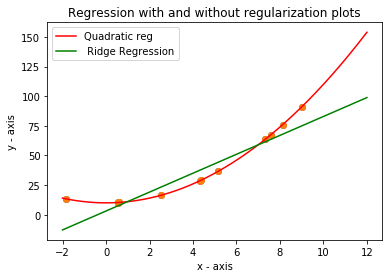

In [44]:

#ploting the graph 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.scatter(X, Y)

i = np.linspace(start = -2, stop = 12, num = 1000)
y_predicted = c + b * i + a * (i**2)

plt.plot(i, y_predicted, label="Quadratic reg", color='red')
generatePlot(X, Y, final, " Ridge Regression", 'green')
plt.title("Regression with and without regularization plots")